# 街道路网中心性分析

通过测量其中心性，我们可以计算并可视化节点或边在路网中的“重要性”

在一些传统的街道路网分析时，街道表示为节点，而交叉口表示为边。我们称之为轴线图，有时也称为对偶图，它实际上是把之前看到的街道路网的拓扑结构发生反转。我们也可以使用OSMNX做到这一点

In [1]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

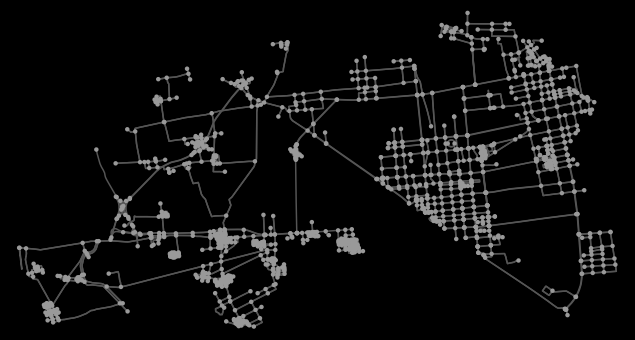

In [2]:
# 下载并投影路网
G = ox.graph_from_place('Guangyang District,Langfang,Hebei,CN', network_type='drive')
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=20, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

# 计算并可视化节点中心性

In [3]:
# 节点接近中心性
node_centrality = nx.closeness_centrality(G)

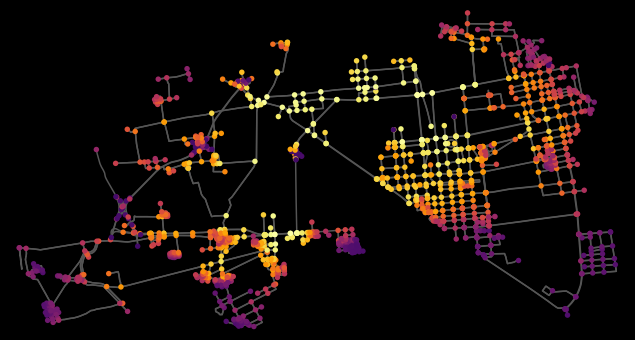

In [4]:
# 绘制出来
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

# 计算并可视化路段的中心性

In [5]:
# 下一个运行框不能正常运行当 networkx 2.1, see https://github.com/gboeing/osmnx-examples/issues/6
nx.__version__

'2.4'

In [6]:
# 边接近中心性:将现在的图转换成轴线图， 将节点变成边，反之，亦然
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

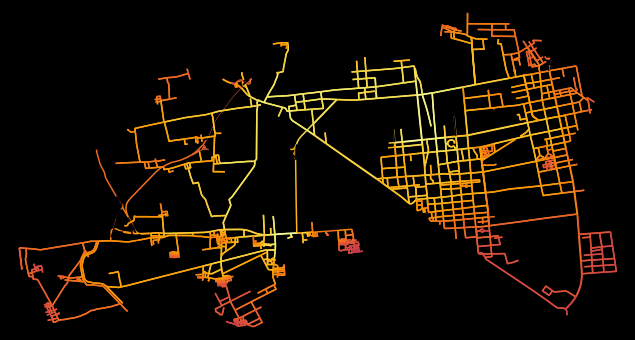

In [7]:
# list of edge values for the orginal graph 原始图的边值列表
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges 色标转换为图形边缘的颜色列表
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph  用折线图中的紧密度中心为原始图的边缘上色
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)